## XOR — N-Dimensional  (n = 12)


> “El XOR de 12 bits es una función de **paridad**: cuenta unos y decide si es **par o impar**. No hay un hiperplano que lo separe; por eso usamos varias capas ocultas para componer relaciones no lineales y capturar esa paridad.”

El **XOR N-dimensional** generaliza la compuerta XOR clásica a `n` bits: devuelve **1** si el número de unos es **impar** y **0** si es **par**.  
Este problema **no es linealmente separable** (ni con 2D ni con 12D), por lo que **requiere capas ocultas** para que la red aprenda combinaciones no lineales de las entradas. A medida que aumenta `n`, crece la complejidad de las interacciones y se vuelve un buen test para evaluar la capacidad de representación del modelo.

---

### Hiperparámetros utilizados

| Parámetro | Valor |
|----------|-------|
| Optimizador | Adam |
| Tasa de aprendizaje | 0.002 |
| Épocas | 150 |
| Función de activación | Sigmoide |
| Arquitectura | **6 capas** (incluye entrada y salida) |
| Neuronas por capa | `12 → 25 → 15 → 10 → 8 → 1` |

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from itertools import product
from matplotlib.lines import Line2D

In [2]:
from main.neural_network.neural_network import train, create_nn, predict
from main.neural_network.layers.activation.functions import Tanh, LeakyRelu, Sigmoid, Relu
from main.neural_network.utils.graphics.regression import learning_curve
from main.neural_network.optimizers.rmsprop import RMSProp
from main.neural_network.optimizers.sgd import SGD
from main.neural_network.optimizers.momentum import Momentum
from main.neural_network.optimizers.adagrad import Adagrad
from main.neural_network.optimizers.adam import Adam
from main.neural_network.losses.mse import MSELoss
from main.neural_network.utils.draw_nn import draw_nn
from main.neural_network.utils.graphics.regression import dispersion_graph
from main.neural_network.neural_network import test_loss

In [3]:
SEED = 78
np.random.seed(SEED)

def generate_n_dimensional_xor(n):
    X = np.array(list(product([0, 1], repeat=n)))
    y = np.sum(X, axis=1) % 2

    X = X.reshape(2**n, n, 1)
    y = y.reshape(2**n, 1)

    return X, y

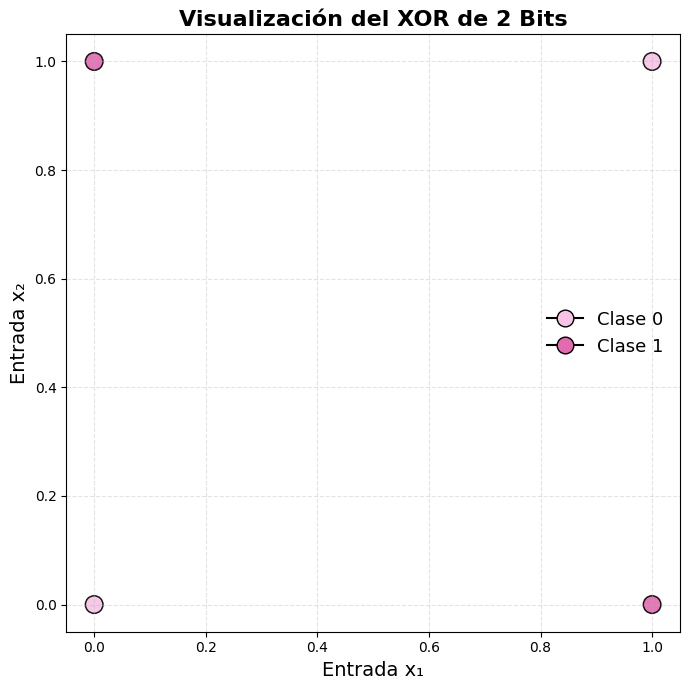

In [4]:
X, y = generate_n_dimensional_xor(2)

x_coords = X[:, 0, 0]
y_coords = X[:, 1, 0]
colors = np.where(y.ravel() == 1, "#E26BAF", "#F7C4E5")

plt.figure(figsize=(7, 7))
plt.scatter(x_coords, y_coords, c=colors, s=160, edgecolors='black', linewidths=1.1, alpha=0.9)

plt.xlabel('Entrada x₁', fontsize=14)
plt.ylabel('Entrada x₂', fontsize=14)
plt.title('Visualización del XOR de 2 Bits', fontsize=16, fontweight='bold')

legend_elements = [
    Line2D([0],[0], marker='o', color='black', label='Clase 0', markerfacecolor='#F7C4E5', markersize=12),
    Line2D([0],[0], marker='o', color='black', label='Clase 1', markerfacecolor='#E26BAF', markersize=12),
]
plt.legend(handles=legend_elements, fontsize=13, frameon=False)

plt.grid(True, linestyle="--", alpha=0.35)
plt.gca().set_facecolor("white")
plt.tight_layout()
plt.show()

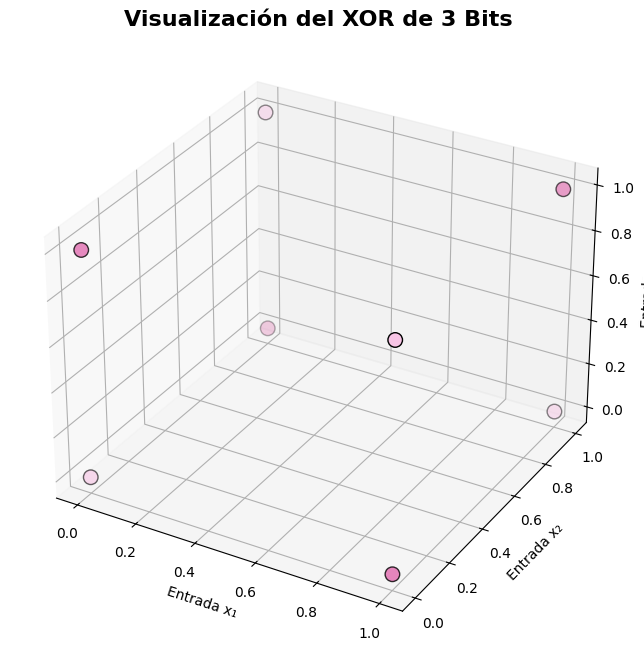

In [5]:
X, y = generate_n_dimensional_xor(3)
x_coords = X[:, 0, 0]
y_coords = X[:, 1, 0]
z_coords = X[:, 2, 0]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    x_coords, y_coords, z_coords,
    c=np.where(y.ravel() == 1, "#E26BAF", "#F7C4E5"),
    s=110, edgecolors='k'
)
ax.set_xlabel('Entrada x₁')
ax.set_ylabel('Entrada x₂')
ax.set_zlabel('Entrada x₃')
ax.set_title('Visualización del XOR de 3 Bits', fontsize=16, fontweight='bold')
plt.show()

In [6]:
X, y = generate_n_dimensional_xor(12)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=True, random_state=SEED
)

In [7]:
np.random.seed(SEED)
optimizers = [Adam(learning_rate=0.002) for _ in range(5)]
activations = [Sigmoid() for _ in range(5)]
loss = MSELoss()
nn = create_nn([12, 25, 15, 10, 8, 1], activations, optimizers)

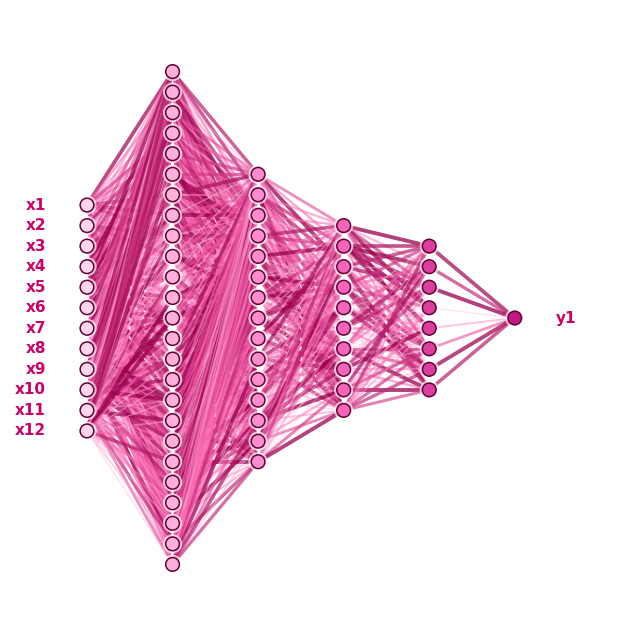

In [8]:
draw_nn(nn)

In [9]:
train_loss = train(nn, loss, X_train, y_train, epochs=200)

In [10]:
_ = test_loss(nn, loss, X_test, y_test)

Loss in test = 0.25022692494281784


In [11]:
y_pred = []
for X, y in zip(X_test, y_test):
    output = predict(nn, X)
    y_pred.append(output)
    print(f'Pred: {output}, Actual: {y}')

Pred: [[0.51411909]], Actual: [0]
Pred: [[0.51411909]], Actual: [0]
Pred: [[0.51411909]], Actual: [1]
Pred: [[0.51411909]], Actual: [1]
Pred: [[0.51411909]], Actual: [1]
Pred: [[0.51411909]], Actual: [0]
Pred: [[0.51411909]], Actual: [1]
Pred: [[0.51411909]], Actual: [1]
Pred: [[0.51411909]], Actual: [0]
Pred: [[0.51411909]], Actual: [0]
Pred: [[0.51411909]], Actual: [1]
Pred: [[0.51411909]], Actual: [1]
Pred: [[0.51411909]], Actual: [1]
Pred: [[0.51411909]], Actual: [1]
Pred: [[0.51411909]], Actual: [1]
Pred: [[0.51411909]], Actual: [0]
Pred: [[0.51411909]], Actual: [1]
Pred: [[0.51411909]], Actual: [0]
Pred: [[0.51411909]], Actual: [0]
Pred: [[0.51411909]], Actual: [0]
Pred: [[0.51411909]], Actual: [0]
Pred: [[0.51411909]], Actual: [1]
Pred: [[0.51411909]], Actual: [1]
Pred: [[0.51411909]], Actual: [1]
Pred: [[0.51411909]], Actual: [1]
Pred: [[0.51411909]], Actual: [0]
Pred: [[0.51411909]], Actual: [1]
Pred: [[0.51411909]], Actual: [0]
Pred: [[0.51411909]], Actual: [0]
Pred: [[0.5141

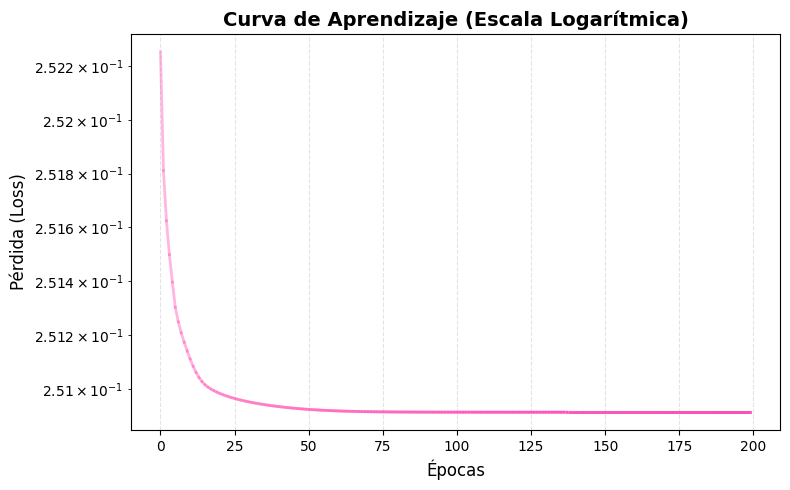

In [12]:
learning_curve(train_loss)

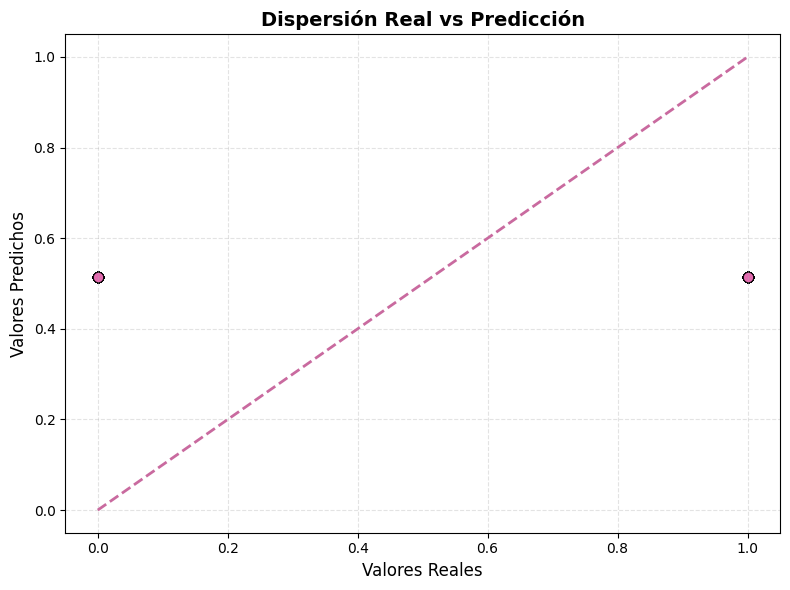

In [13]:

dispersion_graph(y_test, y_pred)

# Experimentos

### Primer test

In [14]:
optimizers = [
    Adagrad(learning_rate=0.002),
    Adam(learning_rate=0.002),
    Adagrad(learning_rate=0.002),
    Adam(learning_rate=0.002),
    Adagrad(learning_rate=0.002)
]

activations = [Sigmoid(), Sigmoid(), Sigmoid(), Sigmoid(), Sigmoid()]

loss = MSELoss()

nn = create_nn([12, 25, 15, 10, 8, 1], activations, optimizers)

_ = train(nn, loss, X_train, y_train, epochs=200)

In [15]:
_ = test_loss(nn, loss, X_test, y_test)

Loss in test = 0.2545510229079829


### Segundo test

In [16]:
optimizers = [
    SGD(learning_rate=0.003),
    SGD(learning_rate=0.003),
    SGD(learning_rate=0.003),
    SGD(learning_rate=0.003),
    SGD(learning_rate=0.003)
]

activations = [Tanh(), Tanh(), Tanh(), Tanh(), Tanh()]

loss = MSELoss()

nn = create_nn([12, 50, 25, 15, 8, 1], activations, optimizers)

_ = train(nn, loss, X_train, y_train, epochs=200)

In [17]:
_ = test_loss(nn, loss, X_test, y_test)

Loss in test = 0.4474292201896074


### Tercer test

In [18]:
optimizers = [
    RMSProp(learning_rate=0.001),
    Adam(learning_rate=0.001),
    RMSProp(learning_rate=0.001),
    Adam(learning_rate=0.001),
    RMSProp(learning_rate=0.001)
]

activations = [LeakyRelu(), LeakyRelu(), LeakyRelu(), LeakyRelu(), LeakyRelu()]

loss = MSELoss()

nn = create_nn([12, 30, 20, 10, 5, 1], activations, optimizers)

_ = train(nn, loss, X_train, y_train, epochs=200)

In [19]:
_ = test_loss(nn, loss, X_test, y_test)

Loss in test = 0.7056448566807372


### Cuarto test

In [20]:
optimizers = [
    Momentum(learning_rate=0.002),
    Momentum(learning_rate=0.002),
    Momentum(learning_rate=0.002),
    Momentum(learning_rate=0.002),
    Momentum(learning_rate=0.002)
]

activations = [Relu(), Relu(), Relu(), Relu(), Relu()]

loss = MSELoss()

nn = create_nn([12, 40, 30, 20, 8, 1], activations, optimizers)

_ = train(nn, loss, X_train, y_train, epochs=200)

In [21]:
_ = test_loss(nn, loss, X_test, y_test)

Loss in test = 0.4990234375


| Test | Problema | Arquitectura               | Activaciones                 | Optimizadores                       | Pérdida | LR capa                             | Épocas | Test Loss |
|-----:|----------|----------------------------|------------------------------|--------------------------------------|--------:|-----------------------------------------|-------:|----------:|
| 1    | XOR nD   | [12, 25, 15, 10, 8, 1]     | Sigmoid → Sigmoid → Sigmoid  | Adam, Adam, Adam, Adam, Adam         | MSE     | 0.002 / 0.002 / 0.002 / 0.002 / 0.002   | 200    | **0.2502269249** |
| 2    | XOR nD   | [12, 25, 15, 10, 8, 1]     | Sigmoid → Sigmoid → Sigmoid  | Adagrad / Adam (mixto)               | MSE     | (igual configuración mixta)             | 200    | **0.2545510229** |
| 3    | XOR nD   | [12, 50, 25, 15, 8, 1]     | Tanh → Tanh → Tanh           | SGD                                  | MSE     | 0.003 / 0.003 / 0.003 / 0.003 / 0.003   | 200    | **0.4474292202** |
| 4    | XOR nD   | [12, 30, 20, 10, 5, 1]     | LeakyReLU → LeakyReLU       | RMSProp / Adam (mixto)               | MSE     | (mixto adaptativo)                      | 200    | **0.7056448567** |
| 5    | XOR nD   | [12, 40, 30, 20, 8, 1]     | ReLU → ReLU                  | Momentum                             | MSE     | 0.002 / 0.002 / 0.002 / 0.002 / 0.002   | 200    | **0.4990234375** |